In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#333333', '#006699']),
    'ps.fonttype': 42,
    'axes.facecolor': 'whitesmoke',
    'figure.facecolor': 'whitesmoke',
    'axes.spines.left' : True,
    'axes.spines.right' : False,
    'axes.spines.top' : False,
    'axes.spines.bottom' : False,
    'font.family': 'sans',
    'font.sans-serif': 'RobotoCondensed-Bold',
    'font.serif': 'Lora-Regular',
    'axes.titlesize': 'x-large',
    'axes.titleweight': 'bold',
    'axes.grid': True,
    'grid.color': 'silver',
    'axes.axisbelow': True,
    'xtick.bottom' : False,
    'ytick.left' : False,
    'axes.titlepad' : 15.0,
    'legend.frameon' : False,
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'axes.titlesize': 30
    
})

In [3]:
df = pd.read_csv('refugeesAndMigrants.csv')
df.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident
0,05/05/18,4.0,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya
1,30/04/18,2.0,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya
2,30/04/18,1.0,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya
3,30/04/18,6.0,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya
4,30/04/18,1.0,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown


In [4]:
## Remove row with all null values

df[df['found dead'].isnull()]

df['found dead'][3927]

'1993'

In [5]:
df.drop(labels=3931, axis=0, inplace=True)

In [6]:
df.number = df.number.astype(int)

In [7]:
df.dtypes

found dead             object
number                  int64
name, gender, age      object
region of origin       object
cause of death         object
source                 object
country of incident    object
dtype: object

### Can't build a datetime series bc this data is inconsistent. Going to do some cleaning

In [8]:
df['year'] = df['found dead'].str.extract(r"(\d+)$")

In [9]:
df['year'] = df.year.astype(int)

In [10]:
df.year.isnull().value_counts()

False    3931
Name: year, dtype: int64

In [11]:
def clean_year(row):
    if row['year'] < 100:
        if row['year'] > 18:
            row['year'] = '19' + str(row['year'])
        else:
            row['year'] = '20' + str(row['year'])
    else:
        row['year'] = str(row['year'])
    return row['year']
     
            

In [12]:
df['year_clean'] = df.apply(clean_year, axis=1)

In [13]:
df['year_clean'] = df.year_clean.str.replace('209$', '2009')
df['year_clean'] = df.year_clean.str.replace('208$', '2008')
df['year_clean'] = df.year_clean.str.replace('207$', '2007')
df['year_clean'] = df.year_clean.str.replace('206$', '2006')
df['year_clean'] = df.year_clean.str.replace('205$', '2005')
df['year_clean'] = df.year_clean.str.replace('204$', '2004')
df['year_clean'] = df.year_clean.str.replace('203$', '2003')
df['year_clean'] = df.year_clean.str.replace('202$', '2002')
df['year_clean'] = df.year_clean.str.replace('201$', '2001')
df['year_clean'] = df.year_clean.str.replace('200$', '2000')

In [14]:
df.year_clean.value_counts().sum()

3931

### Now I've got a structured year for each entry, moving on to the month

In [15]:
df['month'] = df['found dead'].str.extract(r"(\d\d)[/]\d+$")

In [16]:
df['month_alt'] = df[df.month.isnull()]['found dead'].str.extract(r"(\w+) \d\d")

In [17]:
df.month_alt.value_counts()

Mar    53
Oct    52
Aug    47
Jan    44
Nov    44
Dec    36
Jul    35
Sep    32
May    30
Feb    28
Jun    28
Apr    26
Name: month_alt, dtype: int64

In [18]:
def month_alt_clean(row):
    if row['month_alt'] == 'Mar':
        row['month_alt'] = '03'
    elif row['month_alt'] == 'Oct':
        row['month_alt'] = '10'
    elif row['month_alt'] == 'Aug':
        row['month_alt'] = '08'
    elif row['month_alt'] == 'Jan':
        row['month_alt'] = '01'
    elif row['month_alt'] == 'Nov':
        row['month_alt'] = '11'
    elif row['month_alt'] == 'Dec':
        row['month_alt'] = '12'
    elif row['month_alt'] == 'Jul':
        row['month_alt'] = '07'
    elif row['month_alt'] == 'Sep':
        row['month_alt'] = '09'
    elif row['month_alt'] == 'May':
        row['month_alt'] = '05'
    elif row['month_alt'] == 'Jun':
        row['month_alt'] = '06'
    elif row['month_alt'] == 'Feb':
        row['month_alt'] = '02'
    elif row['month_alt'] == 'Apr':
        row['month_alt'] = '04'
    return row['month_alt']
    

In [19]:
df['month_alt_clean'] = df.apply(month_alt_clean, axis=1)

In [20]:
df.month_alt_clean.value_counts()

03    53
10    52
08    47
11    44
01    44
12    36
07    35
09    32
05    30
06    28
02    28
04    26
Name: month_alt_clean, dtype: int64

In [21]:
df.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident,year,year_clean,month,month_alt,month_alt_clean
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,18,2018,05,NaN,NaN
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,18,2018,04,NaN,NaN
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,18,2018,04,NaN,NaN
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,18,2018,04,NaN,NaN
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,18,2018,04,NaN,NaN


In [22]:
df.month.fillna(df.month_alt_clean, inplace=True)

In [23]:
# There are still 55 months missing, so just going to fill those in with January

df.month.fillna('01', inplace=True)

## Time to get the day, and fill in the day with '01' where there isn't one

In [24]:
df['day'] = df['found dead'].str.extract(r"(\d\d)[/]\d\d[/]\d+$")

In [25]:
df.day.fillna('01', inplace=True)

In [26]:
df.dtypes

found dead             object
number                  int64
name, gender, age      object
region of origin       object
cause of death         object
source                 object
country of incident    object
year                    int64
year_clean             object
month                  object
month_alt              object
month_alt_clean        object
day                    object
dtype: object

In [27]:
def clean_date(row): 
    row['found_date_clean'] = (str(row['day']) + '/' + str(row['month']) + '/' +  str(row['year_clean']))
    return row['found_date_clean']

In [28]:
df['found_date_clean'] = df.apply(clean_date, axis=1)

In [29]:
df.found_date_clean.value_counts()

19/06/2000    58
04/02/2018    39
23/04/2007    32
01/11/2015    23
15/07/1995    18
01/01/1999    14
01/03/2008    12
22/04/2008    11
26/10/2005    11
01/10/2002    10
01/01/1994    10
18/01/1996    10
01/03/2000    10
01/10/2015     9
28/10/2015     9
01/01/1997     9
01/09/2002     9
01/01/2000     9
01/03/2002     8
13/02/2018     8
01/01/2017     8
01/08/2006     8
25/07/2013     8
04/09/1994     8
08/12/2001     8
01/08/2004     7
01/09/2008     7
01/01/2002     7
01/07/2002     7
01/01/1993     7
              ..
08/11/2012     1
12/10/1999     1
09/07/2004     1
15/08/2015     1
23/04/1996     1
27/06/2017     1
19/11/2012     1
10/05/2000     1
14/04/2006     1
27/06/2001     1
25/11/2008     1
18/02/2006     1
29/07/2011     1
17/12/2001     1
10/06/1997     1
12/01/2004     1
28/01/2018     1
04/03/2006     1
02/06/2000     1
15/11/2005     1
03/09/2000     1
21/06/2008     1
09/07/2012     1
25/07/2009     1
17/06/1993     1
21/08/2014     1
15/12/2009     1
27/02/2018    

# Now to make a timeseries

In [30]:
df['datetime'] = pd.to_datetime(df['found_date_clean'], format="%d/%m/%Y")
df.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident,year,year_clean,month,month_alt,month_alt_clean,day,found_date_clean,datetime
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,18,2018,05,NaN,NaN,05,05/05/2018,2018-05-05
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,18,2018,04,NaN,NaN,30,30/04/2018,2018-04-30
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,18,2018,04,NaN,NaN,30,30/04/2018,2018-04-30
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,18,2018,04,NaN,NaN,30,30/04/2018,2018-04-30
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,18,2018,04,NaN,NaN,30,30/04/2018,2018-04-30


In [31]:
df_clean = df.drop(columns=['year', 'month', 'month_alt', 'month_alt_clean', 'day', 'found_date_clean'])

In [32]:
df_clean.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident,year_clean,datetime
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30


# Pause to save to csv

In [33]:
df_clean.to_csv('refugees_with_datetime.csv', index=False)

In [34]:
df = df_clean

In [35]:
df.head()

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident,year_clean,datetime
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30


In [36]:
df['region of origin'].value_counts()

unknown                           1080
Sub-Saharan Africa                 243
Africa                             216
Morocco                            145
Afghanistan                        119
Syria                              114
North Africa                        93
Algeria                             90
China                               81
Iraq                                80
Kurdistan                           75
Albania                             71
Nigeria                             69
Tunisia                             67
Somalia                             64
Sri Lanka                           60
Senegal                             54
Pakistan                            53
Eritrea                             51
Iran                                50
Maghreb                             45
Comoros                             44
Turkey                              42
Sudan                               30
Romania                             30
India                    

### For my time plot, going to remove 2018

In [37]:
df_no_2018 = df[~df.year_clean.str.contains('2018')]

In [38]:
df_no_2018['cause of death'][143]

'feared dead after they went missing from punctured smuggler’s dinghy with 150 aboard; 8 bodies found, 86 rescued'

In [39]:
df_no_2018.year_clean = df_no_2018.year_clean.astype(int)

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
df_no_2018.rename(columns={'cause of death': 'description'}, inplace=True)

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [41]:
df_no_2018['suicide'] = df_no_2018.description.str.contains('suicide')

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_no_2018['drowned'] = df_no_2018.description.str.contains('drown|drowned|off coast|sea|sunk|swim|shipwreck|capsized|sank')

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [111]:
df_no_2018['shot'] = df_no_2018.description.str.contains('shot|shooting|gun')

/Users/kevinlitnav/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


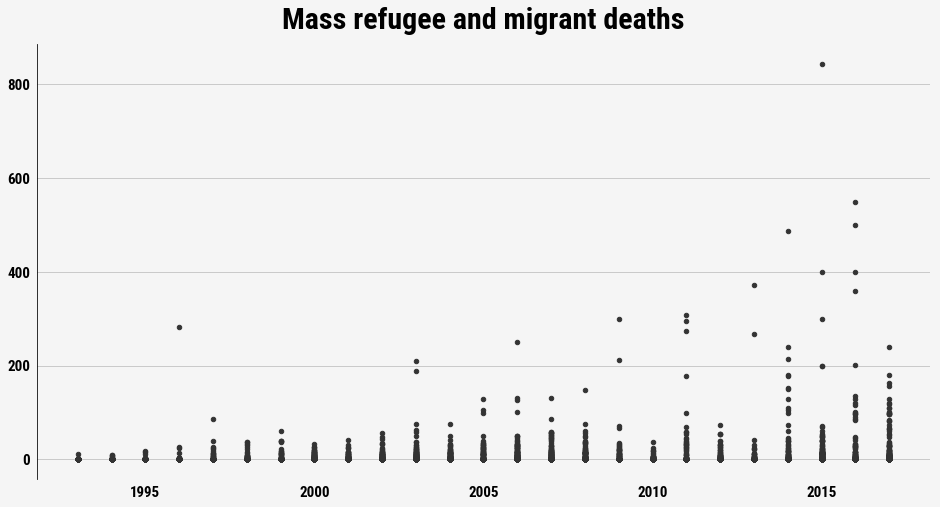

In [54]:
ax = df_no_2018.plot(kind='scatter',figsize=(16,8), x='year_clean', y='number')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Mass refugee and migrant deaths')
ax.grid(axis='x')

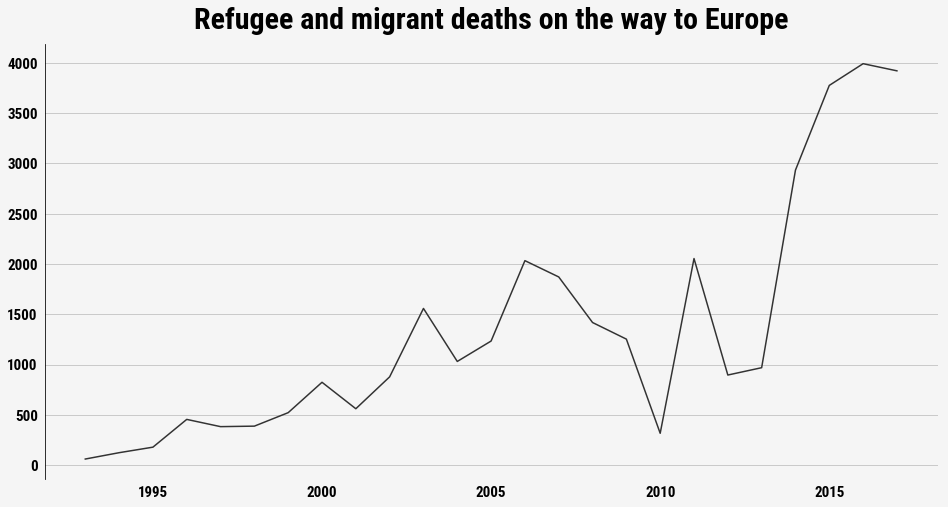

In [44]:
ax = df_no_2018.resample('A', on='datetime').number.sum().plot(figsize=(16,8))

ax.set_xlabel('')

ax.set_title('Refugee and migrant deaths on the way to Europe')
ax.grid(axis='x')

# Looking at descriptions

In [45]:
df.rename(columns={'cause of death': 'description'}, inplace=True)

In [46]:
df.head()

,found dead,number,"name, gender, age",region of origin,description,source,country of incident,year_clean,datetime
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30


In [47]:
df['suicide'] = df.description.str.contains('suicide')

In [48]:
df['drowned'] = df.description.str.contains('drown|drowned|off coast|sea|sunk|swim|shipwreck|capsized|sank')

In [49]:
df.head()

,found dead,number,"name, gender, age",region of origin,description,source,country of incident,year_clean,datetime,suicide,drowned
0,05/05/18,4,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya,2018,2018-05-05,False,True
1,30/04/18,2,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya,2018,2018-04-30,False,False
2,30/04/18,1,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya,2018,2018-04-30,False,False
3,30/04/18,6,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya,2018,2018-04-30,False,False
4,30/04/18,1,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown,2018,2018-04-30,False,True


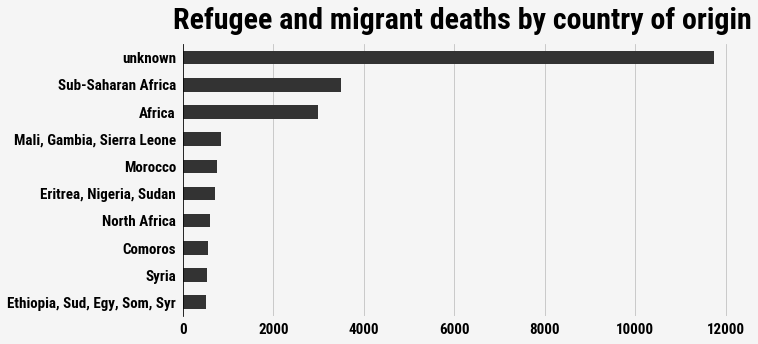

In [50]:
ax = df.groupby('region of origin').number.sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', figsize=(10,5), color=['#333333'])

ax.set_xlabel('')
ax.set_ylabel('')


ax.set_title('Refugee and migrant deaths by country of origin')
ax.grid(axis='y')

Text(21.82,78.465,'Of the 72 gun homicides in 2017, 67 were commited by Turkish border guards.')

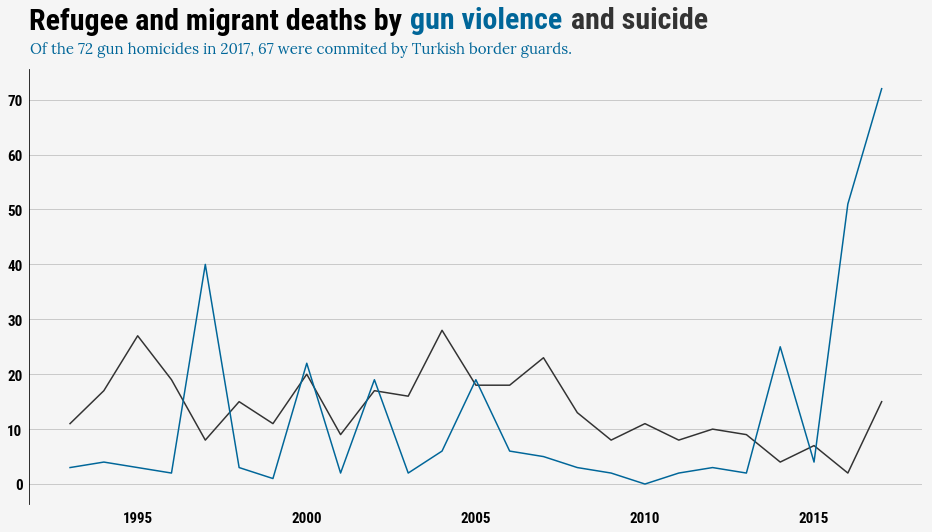

In [222]:
fig, ax = plt.subplots(facecolor='whitesmoke')

ax = df_no_2018[df_no_2018.suicide == True].resample('A', on='datetime').number.sum().plot(figsize=(16,8))

df_no_2018[df_no_2018.shot == True].resample("A", on='datetime').number.sum().plot(figsize=(16,8), ax=ax)

ax.set_xlabel('')
ax.set_title('Refugee and migrant deaths by', loc='left', pad=40, va='baseline')
ax.grid(axis='x')

ax.text(33.05,83.0,"gun violence", fontsize=30, color='#006699', va='baseline')
ax.text(37.82,83.0,"and suicide", fontsize=30, color='#333333', va='baseline')

ax.text(21.82,78.465,"Of the 72 gun homicides in 2017, 67 were commited by Turkish border guards.", fontsize=15, fontname='Lora-Regular', color='#006699', va='baseline')



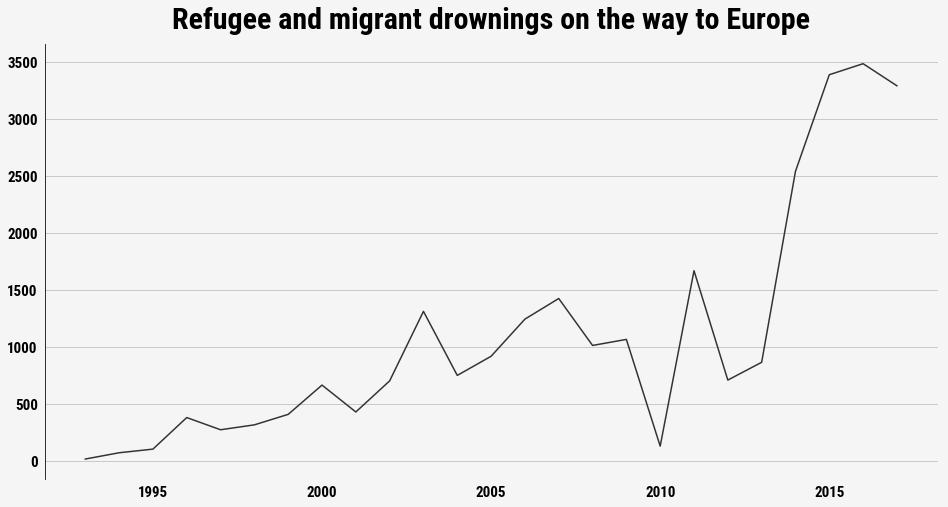

In [52]:
ax = df_no_2018[df_no_2018.drowned == True].resample('A', on='datetime').number.sum().plot(figsize=(16,8))

ax.set_xlabel('')

ax.set_title('Refugee and migrant drownings on the way to Europe')
ax.grid(axis='x')

In [59]:
df['shot'] = df.description.str.contains('shot|shooting|gun')

In [80]:
df['turkish_border_guards'] = df.description.str.contains(r'Turkish border guards')

In [201]:
df[(df.year_clean == '2017') & (df.shot == True) & (df['turkish_border_guards'] == True)].number.sum()

67

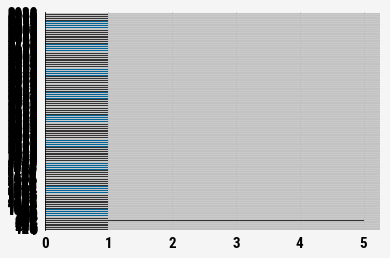

In [107]:
df[df.suicide == True].number.plot(kind='barh', y='suicide')

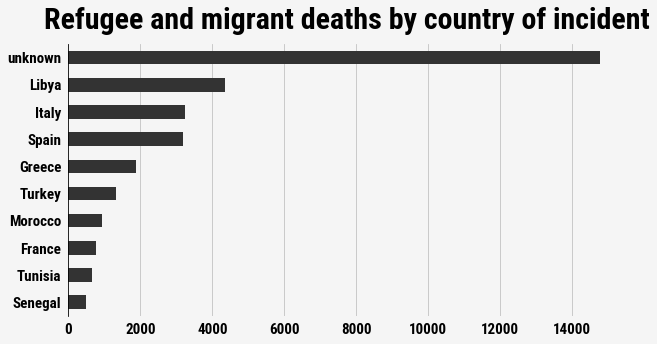

In [95]:
ax = df.groupby('country of incident').number.sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', figsize=(10,5), color=['#333333'])

ax.set_xlabel('')
ax.set_ylabel('')


ax.set_title('Refugee and migrant deaths by country of incident')
ax.grid(axis='y')

'We are gathered here friends,' he said, 'to honour lo Hoon-yera Mora-toorz tut Zamoo-cratz-ya [one hundred martyrs to democracy], children dead, all dead, all murdered in war. It is customary on days like this to call such lost children men. I am unable to call them men for this simple reason: that in the same war in which lo Hoon-yera Mora-toorz tut Zamoo-cratz-ya died, my own son died.

My soul insists that I mourn not a man but a child.

I do not say that children at war do not die like men, if they have to die. To their everlasting honour and our everlasting shame, they do die like men, thus making possible the manly jubilation of patriotic holidays.

But they are murdered children all the same.

And I propose to you that if we are to pay our sincere respects to the hundred lost children of San Lorenzo, that we might best spend the day despising what killed them; which is to say, the stupidity and viciousness of all mankind.

Perhaps, when we remember wars, we should take off our clothes and paint ourselves blue and go on all fours all day long and grunt like pigs. That would surely be more appropriate than noble oratory and shows of flags and well-oiled guns.

I do not mean to be ungrateful for the fine, martial show we are about to see - and a thrilling show it really will be.....

And hooray say I for thrilling shows.

But if today is really in honour of a hundred children murdered in war is today a day for a thrilling show?

The answer is yes, on one condition: that we, the celebrants, are working consciously and tirelessly to reduce the stupidity and viciousness of ourselves and of all mankind.